# 2b. Calculate closed-system degassing path when there is melt and vapor at the start of calculation

## Python set-up
You need to install VolFe once on your machine, if you haven't yet. Then we need to import a few Python packages (including VolFe)

In [5]:
# Install VolFe on your machine. Don't remove the # from this line!
# pip install VolFe # Remove the first # in this line if you have not installed VolFe on your machine before.

# import python packages
import pandas as pd
import matplotlib.pyplot as plt
import VolFe as vf

## Run the calculation

### Bulk composition from intial CO<sub>2</sub>

Sometimes we do not know the bulk composition of the system in terms of dissolved volatile content of the melt and an <i>f</i><sub>O<sub>2</sub></sub> estimate at <i>P<sup>v</sup></i><sub>sat</sub>.

Instead, we might know the melt composition some way along the degassing path (e.g., from melt inclusion analyses) that was in equilibrium with a vapor and an idea of how much vapor was present.

We can still calculate a closed-system degassing path if we add together the melt and vapor composition.

So instead of Sari15-04-33 from Brounce et al. (2014) being representative of the bulk composition of the system, let's instead say its a melt composition some way along the degassing path (still assuming a temperature of 1200 °C). 

We estimate that the initial melt contained 4 wt% CO<sub>2</sub>-eq, which we add to the input dataframe under "initial_CO2wtpc".

In [9]:
# Define the melt composition, fO2 estimate, and T as a dictionary.
my_analysis = {'Sample':'Sari15-04-33',
           'T_C': 1200., # Temperature in 'C
           'SiO2': 47.89, # wt%
           'TiO2': 0.75, # wt%
           'Al2O3': 16.74, # wt%
           'FeOT': 9.43, # wt%
           'MnO': 0.18, # wt%
           'MgO': 5.92, # wt%
           'CaO': 11.58, # wt%
           'Na2O': 2.14, # wt%
           'K2O': 0.63, # wt%
           'P2O5': 0.17, # wt%
           'H2O': 4.17, # wt%
           'CO2ppm': 1487., # ppm
           'STppm': 1343.5, # ppm
           'Xppm': 0., # ppm
           'Fe3FeT': 0.177,
           'initial_CO2wtpc': 4.} # initial CO2 content of the system in wt%

# Turn the dictionary into a pandas dataframe, setting the index to 0.
my_analysis = pd.DataFrame(my_analysis, index=[0])

To use the initial CO<sub>2</sub> in the calculation, we have to change the "bulk_composition" option to "melt+vapor_initialCO2" so it knows how to calculate the bulk composition.

In [7]:
# choose the options I want - everything else will use the default options
my_models = [['bulk_composition','melt+vapor_initialCO2']]

# turn to dataframe with correct column headers and indexes    
my_models = vf.make_df_and_add_model_defaults(my_models)

VolFe will then calculate the bulk composition of the system by calculating the melt and vapor composition at Pvsat based on the input composition, and then add that vapor composition to the melt such that the bulk composition is 4 wt% CO<sub>2</sub>.

In [10]:
degas1 = vf.calc_gassing(my_analysis, models=my_models)

C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2520: RuntimeWarning: invalid value encountered in scalar power
  xg_SO2_ = (K6_*y_O2_*xg_O2_*(y_S2_*xg_S2_*P)**0.5)/y_SO2_
C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2523: RuntimeWarning: invalid value encountered in scalar power
  b = 1.0 + (y_H2O_/(K1_*y_H2_*(y_O2_*xg_O2_*P)**0.5)) + ((K7_*(y_S2_*xg_S2_)**0.5*y_H2O_)/(y_H2S_*(y_O2_*xg_O2_)**0.5))
C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2528: RuntimeWarning: invalid value encountered in scalar power
  xg_H2S_ = (K7_*(y_S2_*xg_S2_)**0.5*y_H2O_*xg_H2O_)/(y_H2S_*(y_O2_*xg_O2_)**0.5)
C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2563: RuntimeWarning: invalid value encountered in scalar power
  wm_S_ = K8_*((y_S2_*xg_S2_)/(y_O2_*xg_O2_))**0.5
C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2564: RuntimeWarning: invalid value encountered in scalar power
  wm_SO3_ = ((K9_*(y_S2_*xg_S2_

2.0 : Switching solve species from OCS to OCH (first time)


C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2568: RuntimeWarning: invalid value encountered in scalar divide
  S62 = (wm_SO3_/M_SO3)/(wm_S_/M_S)
C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2597: RuntimeWarning: divide by zero encountered in scalar divide
  wt_g_S = ((wt_S/M_S) - (wm_S_/M_S) - (wm_SO3_/M_SO3) - (wm_H2S_/M_H2S))/(((xg_SO2_+2.0*xg_S2_+xg_H2S_+xg_OCS_)/Xg_t) - (wm_S_/M_S) - (wm_SO3_/M_SO3) - (wm_H2S_/M_H2S))
C:\Users\ehughes\projects\VolFe\src\VolFe\differential_equations.py:404: RuntimeWarning: divide by zero encountered in scalar divide
  result = (0.5*K12_*K2_*P*xg_CO_*y_CO_*(xg_O2_*y_O2_)**(-2.0)*(P*xg_O2_*y_O2_)**0.5*(K1_*xg_H2_*y_H2_*(P*xg_O2_*y_O2_)**0.5)**2.0/(K3_*M_CH4*xg_O2_) - K2_*K5_*P*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5*(-0.5*K2_*K5_*M_CO2*P*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5/xg_O2_ - 0.25*M_H2O*(K1_*K4_*P*xg_H2_*y_H2_*(P*xg_O2_*y_O2_)**0.5)**0.5/xg_O2_ - M_m_*(-0.5*K2_*K5_*P*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5/xg_O2

2.0 : Switching solve species from OCH to OHS (second time)


C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2532: RuntimeWarning: invalid value encountered in scalar power
  xg_H2O_ = (xg_H2_*K1_*y_H2_*(y_O2_*xg_O2_*P)**0.5)/y_H2O_
C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2533: RuntimeWarning: invalid value encountered in scalar power
  xg_H2S_ = (K7_*(y_S2_*xg_S2_)**0.5*y_H2O_*xg_H2O_)/(y_H2S_*(y_O2_*xg_O2_)**0.5)
C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2535: RuntimeWarning: invalid value encountered in scalar power
  xg_CO2_ = (1.0 - xg_S2_ - xg_O2_ - xg_H2_ - xg_H2O_ - xg_H2S_ - xg_SO2_)/(1.0 + (y_CO2_/(K2_*y_CO_*(y_O2_*xg_O2_*P)**0.5)) + ((y_CO2_*y_SO2_*xg_SO2_)/(K2_**3.0*K10_*y_OCS_*(y_O2_*xg_O2_)**1.5*P**0.5)) + ((y_CO2_*(y_H2O_*xg_H2O_)**2.0)/(K3_*y_CH4_*(y_O2_*xg_O2_)**2.0)))
C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2536: RuntimeWarning: invalid value encountered in scalar power
  xg_CO_ = (y_CO2_*xg_CO2_)/(K2_*y_CO_*(y_O2_*xg_O2_*P)**0.5)


1.0 : Switching solve species from OCS to OCH (first time)


C:\Users\ehughes\projects\VolFe\src\VolFe\differential_equations.py:389: RuntimeWarning: divide by zero encountered in scalar divide
  result = (0.5*K12_*K2_*P*xg_CO_*y_CO_*(xg_O2_*y_O2_)**(-2.0)*(P*xg_O2_*y_O2_)**0.5*(K1_*xg_H2_*y_H2_*(P*xg_O2_*y_O2_)**0.5)**2.0/(K3_*M_CH4*xg_O2_) - K2_*K5_*P*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5*(-0.5*K2_*K5_*M_CO2*P*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5/xg_O2_ - 0.25*M_H2O*(K1_*K4_*P*xg_H2_*y_H2_*(P*xg_O2_*y_O2_)**0.5)**0.5/xg_O2_ - M_m_*(-0.5*K2_*K5_*P*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5/xg_O2_ - 0.25*(K1_*K4_*P*xg_H2_*y_H2_*(P*xg_O2_*y_O2_)**0.5)**0.5/xg_O2_))/(K2_*K5_*M_CO2*P*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5 + M_H2O*(K1_*K4_*P*xg_H2_*y_H2_*(P*xg_O2_*y_O2_)**0.5)**0.5 + M_m_*(-K2_*K5_*P*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5 - (K1_*K4_*P*xg_H2_*y_H2_*(P*xg_O2_*y_O2_)**0.5)**0.5 + 1.0))**2 - 0.5*K2_*K5_*P*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5/(xg_O2_*(K2_*K5_*M_CO2*P*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5 + M_H2O*(K1_*K4_*P*xg_H2_*y_H2_*(P*xg_O2_*y_O2_)**0.5)**0.5

1.0 : Switching solve species from OCH to OHS (second time)
solver failed, calculation aborted at P =  1.0 2025-02-01 11:33:53.549803


### Bulk composition from amount of co-existing vapor

We might not have an estimate of the initial CO<sub>2</sub> content of the melt.

Instead we might estimate that there is 3 wt% vapor present in equilibrium with the known melt composition.

In that case, we specify the amount of vapor present as wt% of the system instead of the initial CO2 content in the input data frame.

In [19]:
# Define the melt composition, fO2 estimate, and T as a dictionary.
my_analysis = {'Sample':'Sari15-04-33',
           'T_C': 1200., # Temperature in 'C
           'SiO2': 47.89, # wt%
           'TiO2': 0.75, # wt%
           'Al2O3': 16.74, # wt%
           'FeOT': 9.43, # wt%
           'MnO': 0.18, # wt%
           'MgO': 5.92, # wt%
           'CaO': 11.58, # wt%
           'Na2O': 2.14, # wt%
           'K2O': 0.63, # wt%
           'P2O5': 0.17, # wt%
           'H2O': 4.17, # wt%
           'CO2ppm': 1487., # ppm
           'STppm': 1343.5, # ppm
           'Xppm': 0., # ppm
           'Fe3FeT': 0.177,
           'wt_g': 3.} # wt% vapor in equilibrium with the melt

# Turn the dictionary into a pandas dataframe, setting the index to 0.
my_analysis = pd.DataFrame(my_analysis, index=[0])

To use the amount of vapor present in the calculation, we have to change the "bulk_composition" option to "melt+vapor_wtg".

In [20]:
# choose the options I want - everything else will use the default options
my_models = [['bulk_composition','melt+vapor_wtg']]

# turn to dataframe with correct column headers and indexes    
my_models = vf.make_df_and_add_model_defaults(my_models)

VolFe will then calculate the bulk composition of the system by calculating the melt and vapor composition at Pvsat based on the input composition, and then add 3 wt% of that vapor composition to the melt.

In [21]:
degas2 = vf.calc_gassing(my_analysis, models=my_models)

C:\Users\ehughes\projects\VolFe\src\VolFe\differential_equations.py:291: RuntimeWarning: invalid value encountered in scalar divide
  result = (-K11_*P*xg_CO_*y_CO_/M_CO - 0.25*K12_*K2_*P*xg_CO_*y_CO_*(xg_O2_*y_O2_)**(-2.0)*(P*xg_O2_*y_O2_)**0.5*(K3_*y_CH4_*y_H2O_**(-1.0)*(xg_O2_*y_O2_)**2.0*(P*xg_O2_*y_O2_)**(-0.5)*(-K7_*y_H2O_*(xg_O2_*y_O2_)**(-0.5)*(xg_S2_*y_S2_)**0.5/y_H2S_ + 2.0*(-K2_*xg_CO_*y_CO_*y_H2O_**2.0*(xg_O2_*y_O2_)**(-2.0)*(P*xg_O2_*y_O2_)**0.5*(K2_*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5/y_CO2_ + K6_*xg_O2_*y_O2_*(P*xg_S2_*y_S2_)**0.5/y_SO2_ + xg_CO_ + xg_O2_ + xg_S2_ - 1.0 + K6_*P*xg_O2_*y_O2_*(xg_CO_*y_CO_)**3.0*(P*xg_S2_*y_S2_)**0.5*(K2_*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5)**(-2.0)/(K10_*y_OCS_))/(K3_*y_CH4_) + 0.25*(K7_*y_H2O_*(xg_O2_*y_O2_)**(-0.5)*(xg_S2_*y_S2_)**0.5/y_H2S_ + 1.0 + y_H2O_*(P*xg_O2_*y_O2_)**(-0.5)/(K1_*y_H2_))**2.0)**0.5 - 1.0 - y_H2O_*(P*xg_O2_*y_O2_)**(-0.5)/(K1_*y_H2_))/(K2_*xg_CO_*y_CO_))**2.0/(K3_*M_CH4) - K2_*K5_*P*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5

1.0 : Switching solve species from OCS to OCH (first time)


C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2568: RuntimeWarning: invalid value encountered in scalar divide
  S62 = (wm_SO3_/M_SO3)/(wm_S_/M_S)
C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2597: RuntimeWarning: divide by zero encountered in scalar divide
  wt_g_S = ((wt_S/M_S) - (wm_S_/M_S) - (wm_SO3_/M_SO3) - (wm_H2S_/M_H2S))/(((xg_SO2_+2.0*xg_S2_+xg_H2S_+xg_OCS_)/Xg_t) - (wm_S_/M_S) - (wm_SO3_/M_SO3) - (wm_H2S_/M_H2S))
C:\Users\ehughes\projects\VolFe\src\VolFe\differential_equations.py:404: RuntimeWarning: divide by zero encountered in scalar divide
  result = (0.5*K12_*K2_*P*xg_CO_*y_CO_*(xg_O2_*y_O2_)**(-2.0)*(P*xg_O2_*y_O2_)**0.5*(K1_*xg_H2_*y_H2_*(P*xg_O2_*y_O2_)**0.5)**2.0/(K3_*M_CH4*xg_O2_) - K2_*K5_*P*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5*(-0.5*K2_*K5_*M_CO2*P*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5/xg_O2_ - 0.25*M_H2O*(K1_*K4_*P*xg_H2_*y_H2_*(P*xg_O2_*y_O2_)**0.5)**0.5/xg_O2_ - M_m_*(-0.5*K2_*K5_*P*xg_CO_*y_CO_*(P*xg_O2_*y_O2_)**0.5/xg_O2

1.0 : Switching solve species from OCH to OHS (second time)


C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2532: RuntimeWarning: invalid value encountered in scalar power
  xg_H2O_ = (xg_H2_*K1_*y_H2_*(y_O2_*xg_O2_*P)**0.5)/y_H2O_
C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2533: RuntimeWarning: invalid value encountered in scalar power
  xg_H2S_ = (K7_*(y_S2_*xg_S2_)**0.5*y_H2O_*xg_H2O_)/(y_H2S_*(y_O2_*xg_O2_)**0.5)
C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2535: RuntimeWarning: invalid value encountered in scalar power
  xg_CO2_ = (1.0 - xg_S2_ - xg_O2_ - xg_H2_ - xg_H2O_ - xg_H2S_ - xg_SO2_)/(1.0 + (y_CO2_/(K2_*y_CO_*(y_O2_*xg_O2_*P)**0.5)) + ((y_CO2_*y_SO2_*xg_SO2_)/(K2_**3.0*K10_*y_OCS_*(y_O2_*xg_O2_)**1.5*P**0.5)) + ((y_CO2_*(y_H2O_*xg_H2O_)**2.0)/(K3_*y_CH4_*(y_O2_*xg_O2_)**2.0)))
C:\Users\ehughes\projects\VolFe\src\VolFe\equilibrium_equations.py:2536: RuntimeWarning: invalid value encountered in scalar power
  xg_CO_ = (y_CO2_*xg_CO2_)/(K2_*y_CO_*(y_O2_*xg_O2_*P)**0.5)


1.0 : Switching solve species from OCS to OCH (first time)
1.0 : Switching solve species from OCH to OHS (second time)
solver failed, calculation aborted at P =  1.0 2025-02-01 11:40:36.271772


## Plotting

And then we can plot them for comparison, where 4 wt% initial CO<sub>2</sub> is the solid black curve and 3 wt% additional vapor is the dotted black curve.

(4000.0, 0.0)

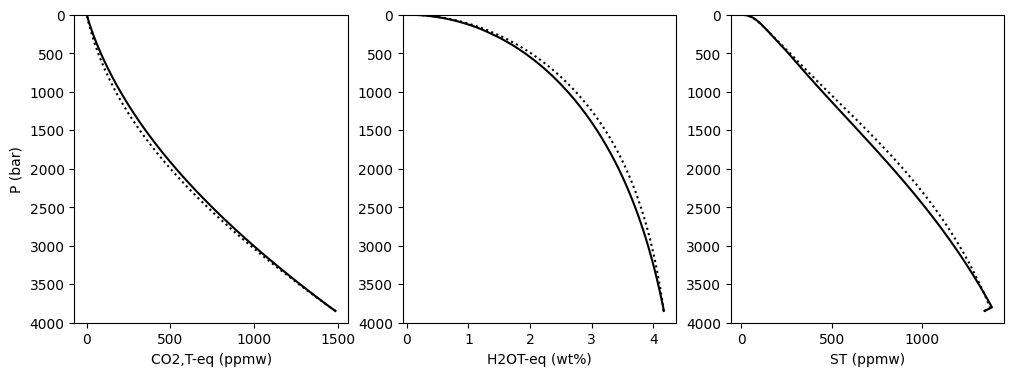

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

data1 = degas1 # sulfur cannot saturate
data2 = degas2 # sulfur can saturate

# Plotting results
ax1.plot(data1['CO2T-eq_ppmw'], data1['P_bar'], '-k')
ax1.plot(data2['CO2T-eq_ppmw'], data2['P_bar'], ':k')
ax2.plot(data1['H2OT-eq_wtpc'], data1['P_bar'], '-k')
ax2.plot(data2['H2OT-eq_wtpc'], data2['P_bar'], ':k')
ax3.plot(data1['ST_ppmw'], data1['P_bar'], '-k')
ax3.plot(data2['ST_ppmw'], data2['P_bar'], ':k')

ax1.set_ylabel('P (bar)')
ax1.set_xlabel('CO2,T-eq (ppmw)')
ax2.set_xlabel('H2OT-eq (wt%)')
ax3.set_xlabel('ST (ppmw)')
ax1.set_ylim([4000,0])
ax2.set_ylim([4000,0])
ax3.set_ylim([4000,0])